### Task
1. Import pandas and matplotlib.pyplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Task
1. Read 'iris.csv' and take a look. A good look.
2. Group data by its 'variety'. Give 'min', 'max', 'mean'.

In [2]:
df=pd.read_csv('/Users/narirock/Documents/Python/stat_class_materials/csv/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.groupby('variety')['sepal.length'].agg(['min','max','mean'])

,min,max,mean
variety,,,
Setosa,4.3,5.8,5.006
Versicolor,4.9,7.0,5.936
Virginica,4.9,7.9,6.588


### Task 
1. Import seaborn as sns
2. Pairplot the iris data.

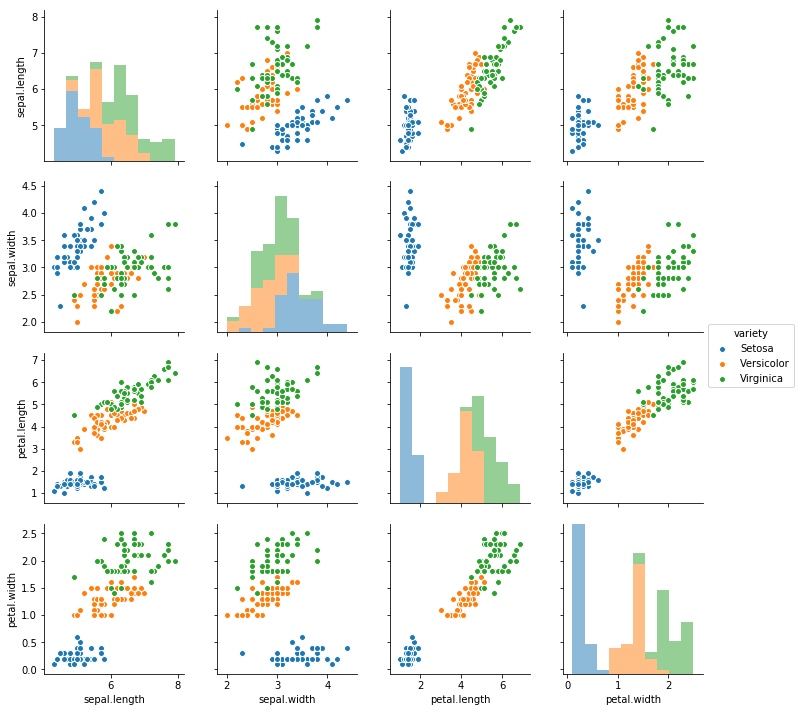

In [4]:
import seaborn as sns
sns.pairplot(df, hue='variety',diag_kws=dict(alpha=0.5))
plt.show()

### Task
1. Import sklearn.preprocessing.StandardScaler http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
2. Let x be the feature values and y, the target values, 'variety' in this case.

3. Use StandardScaler to normalize the data.

In [5]:
from sklearn.preprocessing import StandardScaler

features = ['sepal.length','sepal.width','petal.length','petal.width']
x = df.loc[:,features].values
y = df.loc[:,['variety']].values
x = StandardScaler().fit_transform(x)

### Task
1. Import sklearn.decomposition.PCA. http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. Set pca with n_component of 2 since we are reducing it from 4 to 2.
3. Normalize it.
4. Save it as a dataframe.

In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,
                         columns=['principal component 1','principal component 2'])

### Task
1. Combine the dataframe and df['variety'].

In [37]:
finalDf=pd.concat([principalDf, df[['variety']]],axis=1)

### Task
1. Plot it.

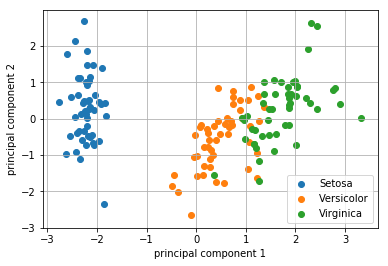

In [8]:
ax=plt.subplot(111)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')

targets=['Setosa','Versicolor','Virginica']
for target in targets:
    indicesToKeep = finalDf['variety'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'])
ax.legend(targets)
ax.grid() 

### Task
1. Find the explained variance ratio for each component. (exploratory factor analysis)

In [29]:
pca.explained_variance_ratio_
# The first principal component contains 72.96% of the variance and 
#  the second principal component contains 22.85% of the variance. 
# Together, the two components contain 95.71% of the information.


array([0.72962445, 0.22850762])

========================================================
### Task
1. PCA 'wine.csv'.
2. Find the explained variance ratio for each component.

In [12]:
data=pd.read_csv('/Users/narirock/Documents/Python/stat_class_materials/csv/wine.csv',header=None)
data.columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar',
              'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density',
              'pH','sulphates','alcohol','quality','result']
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,result
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


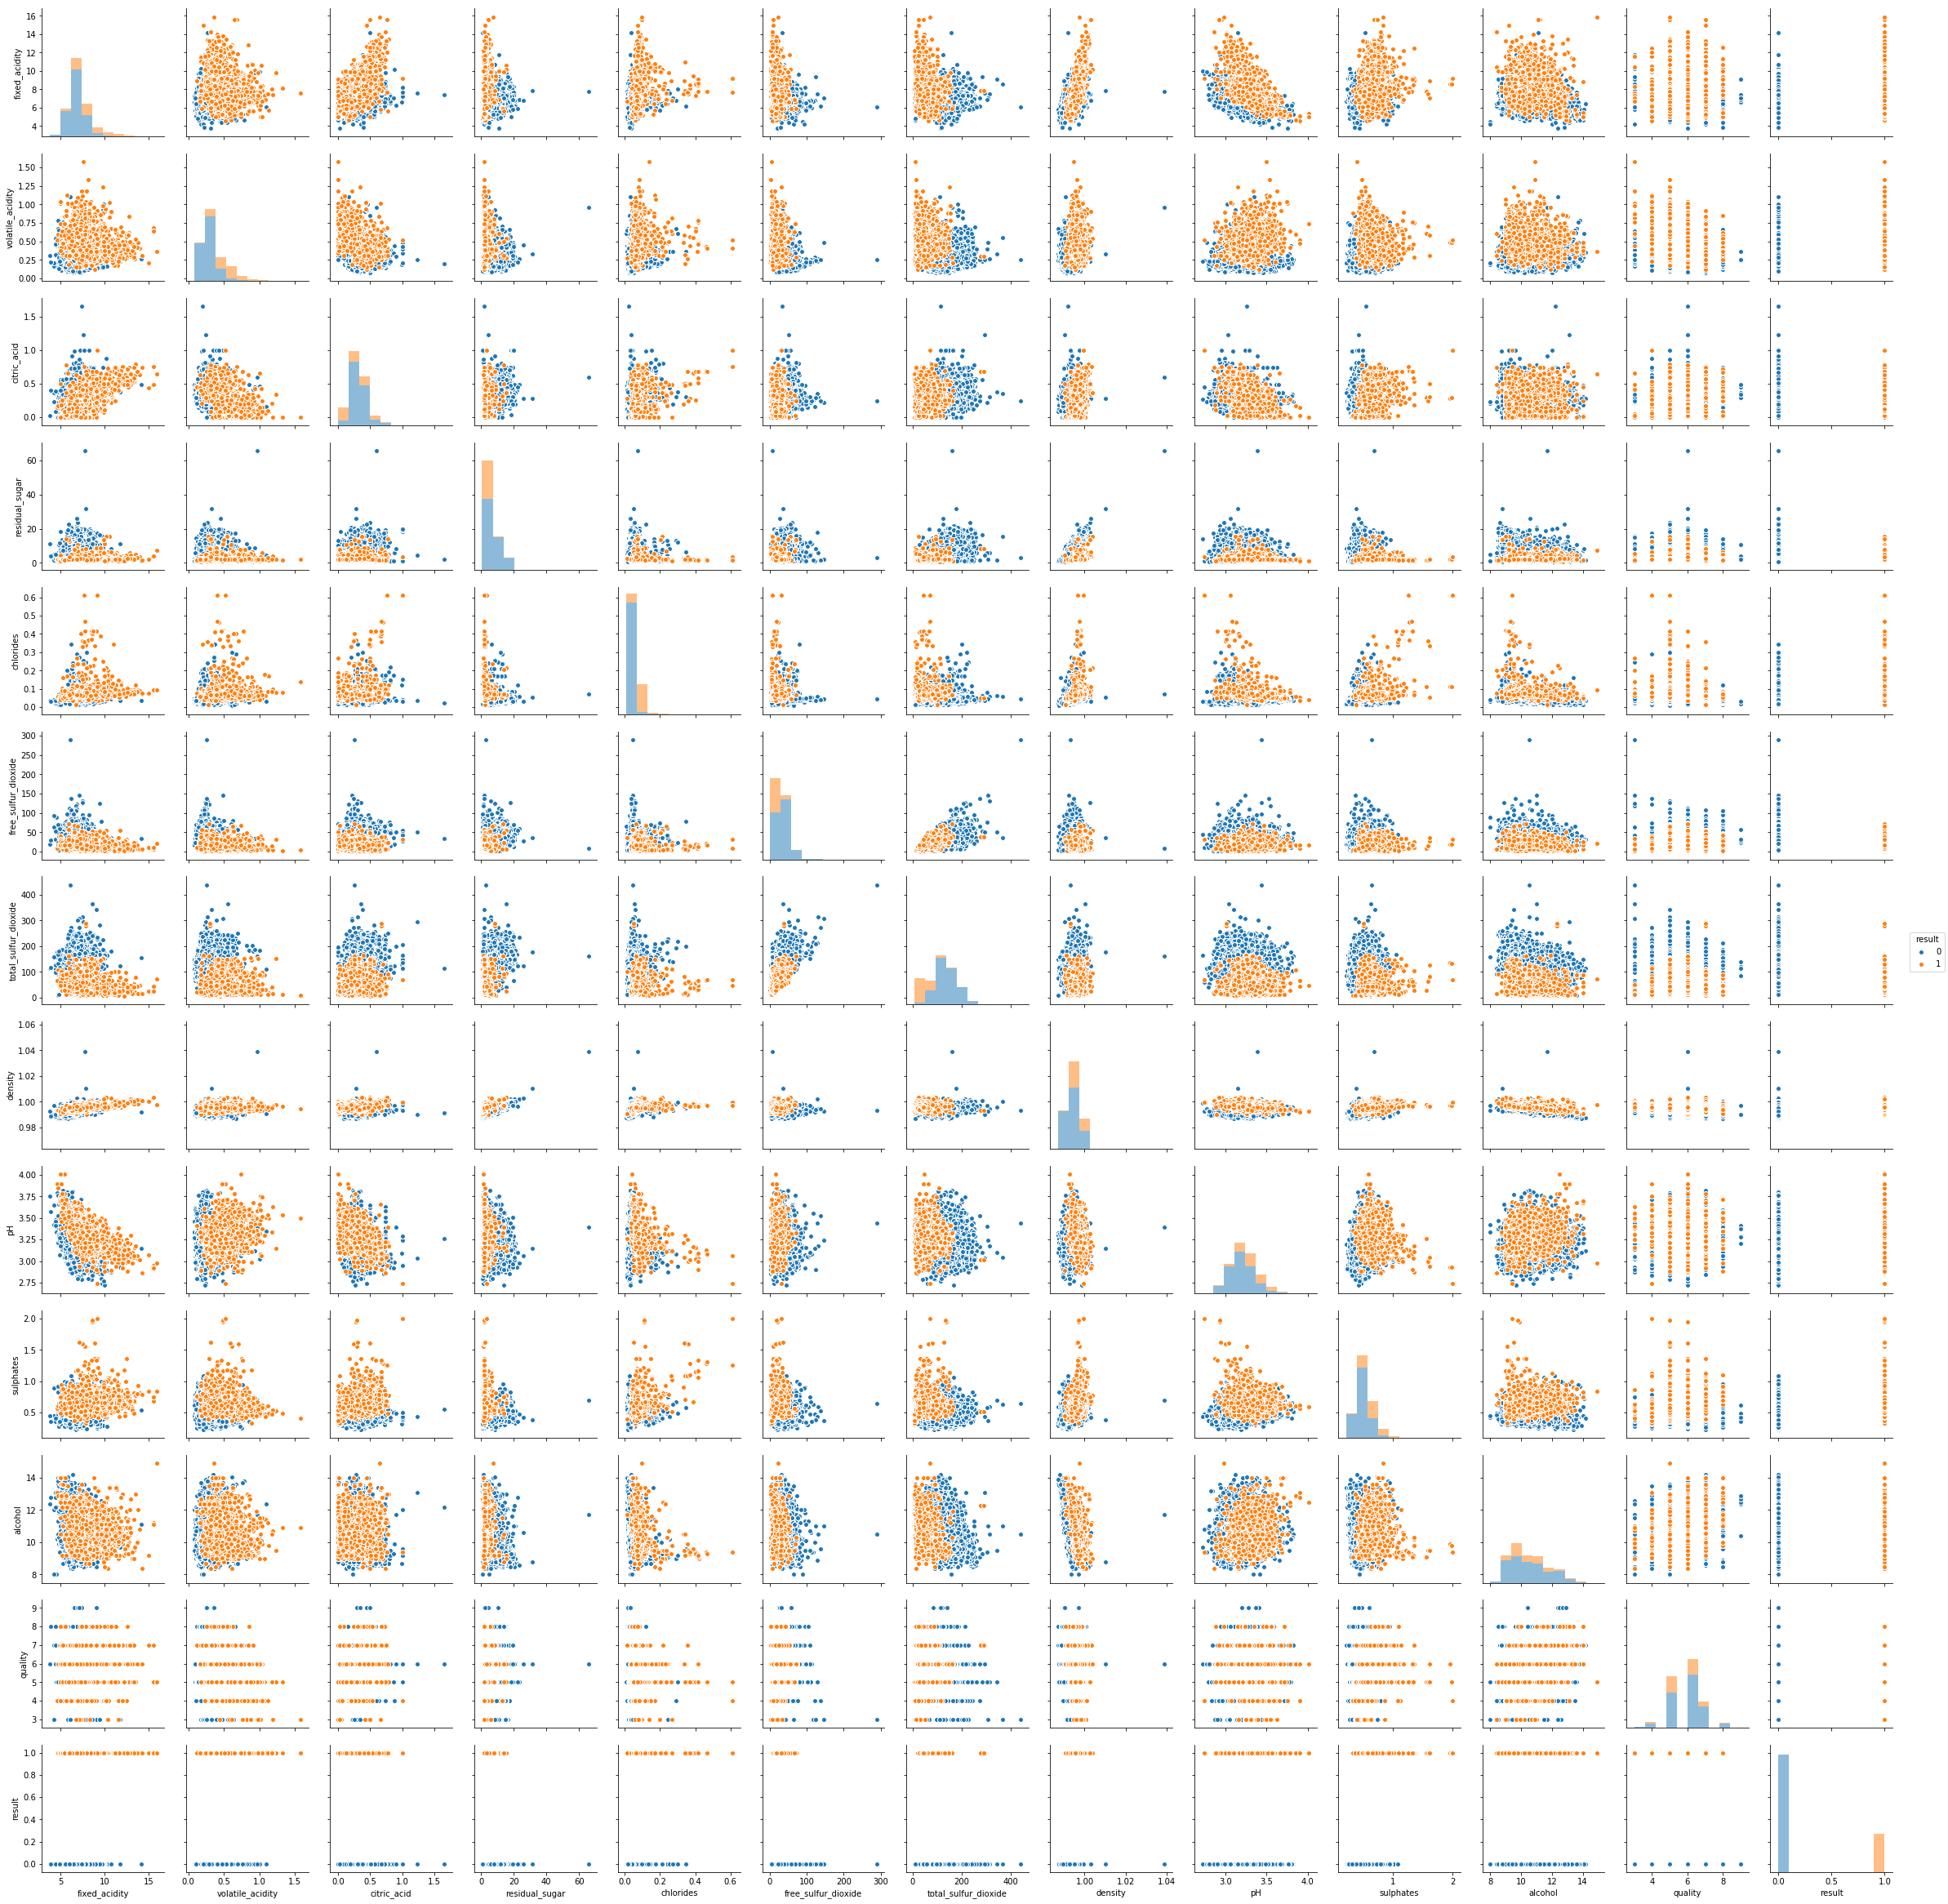

In [13]:
sns.pairplot(data, hue='result',diag_kws=dict(alpha=0.5))
plt.show()

In [14]:
data.groupby('result')['citric_acid'].agg(['min','max','mean'])

,min,max,mean
result,,,
0,0.0,1.66,0.334192
1,0.0,1.00,0.270976


In [15]:
feature = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar',
              'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density',
              'pH','sulphates','alcohol','quality']
#['preganacies','glucose','blood_pressure','skin_thickness','insulin','bmi','pedigree']
a = data.loc[:,feature].values
b = data.loc[:,['result']].values

In [16]:
a = StandardScaler().fit_transform(a)

In [17]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
principalComponents=pca.fit_transform(a)
principalDf=pd.DataFrame(data=principalComponents,
                         columns=['principal component 1','principal component 2'])

In [18]:
finalDf=pd.concat([principalDf, data[['result']]],axis=1)

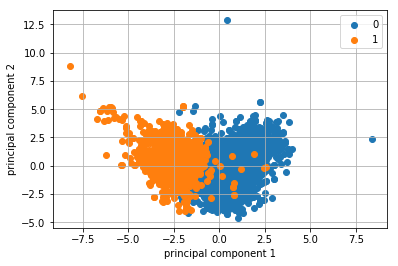

In [19]:
ax=plt.subplot(111)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')

targets=[0,1]
for target in targets:
    indicesToKeep = finalDf['result'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'])
ax.legend(targets)
ax.grid() 

In [20]:
pca.explained_variance_ratio_

array([0.25346226, 0.22082117])